<a href="https://colab.research.google.com/github/akiortagem/ml-ds-intro-notebooks/blob/main/Lab_1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Course LAB 1

Here's your first lab. It's an easy one, just designed to repeat what you already learn in the slides and expand it a little bit more. You will also encounter exceptions in this lab. Practice a little bit  of problem solving in this lab! Have fun! Don't be afraid to ask me if you have any trouble finishing the lab.

## Predicting ManHour from Project Specification

Problem Statement :
> The Project Management Officer GM is currently trying to cooperate with Sales by providing them an easy way to price a project. One of the easiest way to do that is by calculating ManHour of a project. The Data Scientist team is tasked to produce a model that would predict ManHour needed given a project spec.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Download the data by executing this codeblock

In [20]:
!wget --no-check-certificate \
"https://bali.asyst.co.id/public.php?service=files&t=f7aa1e30c29218731a209d4dde0d39cd&download" \
-O /tmp/project-spec.csv

--2020-11-20 08:12:09--  https://bali.asyst.co.id/public.php?service=files&t=f7aa1e30c29218731a209d4dde0d39cd&download
Resolving bali.asyst.co.id (bali.asyst.co.id)... 103.9.36.27
Connecting to bali.asyst.co.id (bali.asyst.co.id)|103.9.36.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3271 (3.2K) [text/csv]
Saving to: ‘/tmp/project-spec.csv’

/tmp/project-spec.c 100%[===================>]   3.19K  --.-KB/s    in 0s      

2020-11-20 08:12:11 (103 MB/s) - ‘/tmp/project-spec.csv’ saved [3271/3271]



Load the data and preview it!

In [ ]:
project_data = pd.read_csv('/tmp/project-spec.csv')#YOUR CODE HERE

#SAMPLE THE DATA BELOW
project_data.sample(10)

#Expected result : A table of 10 rows displaying the table's data.

Each of the column of the table represents the complexity rating of the project's component.

*   ui : UI/Frontend development complexity
*   be : Backend development complexity
*   algo : Algorithm development complexity
*   infra : Infrastructure and deployment complexity
*   anz : Business analysis complexity
*   aff : Company affinity with PT Asyst
*   skl : Skill coverage of PT Asyst developers
*   manhour : Actual manhour worked on the project

See if each column in the table has any apparent relations to the target column (manhours)!

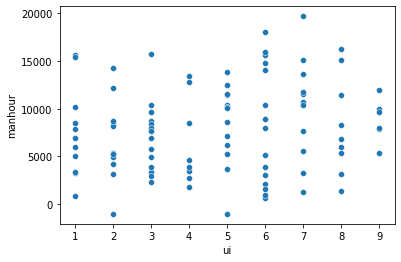

In [46]:
#YOUR CODE HERE
sns.scatterplot(x='ui', y='manhour', data=project_data)
#Expected result : visualization describing relationship of each columns to manhours

Now fit and train the data with linear regression!

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
'''
Hint : Multiple columns for X. Try Googling around on how to select multiple
columns with pandas.
'''
X = project_data[['ui', 'be', 'algo', 'infra', 'anz', 'aff', 'skl']].to_numpy()
y = project_data['manhour'].to_numpy()

reg = LinearRegression().fit(X, y)

Now that you have fitted your model. Time to make some test prediction! Let's predict manhours for these complexities :

ui = 8
be = 3
algo = 5
infra = 2
anz = 4
aff = 5
skl = 5

In [43]:
def manhour_predict(features):
  features = np.array(features).reshape(1,-1)
  return reg.predict(features)

In [47]:
manhour_predict([8,3,5,2,4,5,5]) #Expected result : ManHour of somewhere in the 6000s

array([6230.93069255])